In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
raw_train = pd.read_csv("/kaggle/input/titanic/train.csv")
raw_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
raw_test = pd.read_csv("/kaggle/input/titanic/test.csv")
raw_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Eksplorasi Data

In [4]:
raw_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
raw_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
raw_train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
raw_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
raw_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
raw_test.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


## Cek Data Duplikat

In [10]:
raw_train.duplicated().sum()

0

In [11]:
raw_test.duplicated().sum()

0

Tidak ada data duplikat pada `raw_train` dan `raw_test`.

## Cek Missing Value

In [12]:
raw_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Terdapat 177 _missing data_ pada kolom `Age`, 687 _missing data_ pada kolom `Cabin`, dan 2 _missing data_ pada kolom `Embarked` di dalam _dataframe_ `raw_train`.

In [13]:
raw_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Terdapat 86 _missing data_ pada kolom `Age`, 1 _missing data_ pada kolom `Fare`, dan 327 _missing data_ pada kolom `Cabin` dalam _dataframe_ `raw_test`.

## Target
Tujuan proyek ini adalah memprediksi penumpang Titanic selamat atau tidak. Sehingga target adalah kolom `Survived`. Penumpang selamat bernilai 1 dan penumpang yang tidka selamat bernilai 0.

## Cek Apakah Target pada Train Data termasuk _Imbalance_

In [14]:
raw_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Jumlah yang selamat (1) dan tidak selamat (0) relatif tidak jauh berbeda, sehingga data tersebut bukan termasuk _imbalance data_.

## Hapus kolom yang tidak revelevan
Kolom `Cabin` dan `Ticket` memiliki banyak data yang unik, sehingga kedua kolom tersebut tidak memberikan berbedaan signifikan pada hasil prediksi. Untuk kolom `PassengerId` akan digunkan dalam dalam _submission_. Sedangkan pada `Name` terdapat gelar seperti Mr., Mrs. dsb. Gelar tersebut mungkin akan berguna dalam pemodelan.

In [15]:
raw_train.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
raw_test.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

## Korelasi Antar Numerikal Kolom

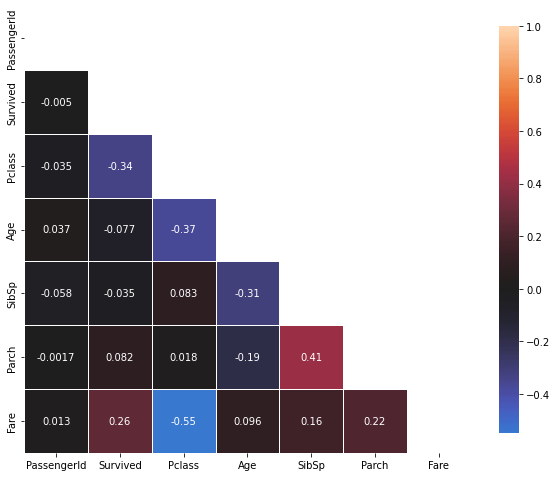

In [16]:
plt.subplots(figsize=(10, 15))
data=raw_train.corr()
mask = np.triu(np.ones_like(data, dtype=bool))
sns.heatmap(data, 
            mask=mask, 
            vmax=1, 
            center=0, 
            annot = True,
            square=True, 
            linewidths=.5,
            cbar_kws={"shrink": .5})
plt.show()

# Data Cleaning


In [17]:
# train & test dijadikan satu
all_data = pd.concat([raw_train, raw_test])

## Menangani _Missing Values_

In [18]:
all_data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Embarked         2
dtype: int64

### Feature Age
Berdasarkan _heatmap_ korelasi antar numerikal kolom, fitur `Age` terlihat memiliki korelasi dengan `Pclass`,`SibSp`, dan `Parch`. Fitur `Age` memiliki korelasi negatif kuat dengan `Pclass` jika dibandingkan fitur `SibSp` dan `Parch`. Oleh karena itu, dalam mengisi missing data pada kolom `Age` akan memperhatikan `Pclass`-nya. Untuk kategorikal kolomnya lebih masuk akal `Age` juga berhubungan dengan `Sex`.

In [19]:
all_data.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: Age, dtype: float64

In [20]:
all_data.Age = all_data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

### Feature Fare
Berdasarkan _heatmap_ korelasi antar numerikal kolom, fitur `Fare` memiliki korelasi negatif kuat dengan `Pclass`. Untuk kategorikal kolomnya juga akan memperhitungkan `Sex`.

In [21]:
all_data.groupby(['Pclass', 'Sex'])['Fare'].median()

Pclass  Sex   
1       female    80.92915
        male      49.50420
2       female    23.00000
        male      13.00000
3       female    10.48960
        male       7.89580
Name: Fare, dtype: float64

In [22]:
all_data.Fare = all_data.groupby(['Pclass', 'Sex'])['Fare'].transform(lambda x: x.fillna(x.median()))

### Feature Embarked
Embarked adalah categorical feature. dari dataframe, feature Embarked didominasi oleh S. oleh karena itu, missing value pada feature Embarked akan diisi oleh modus pada faeture tersebut, yaitu S.

In [23]:
all_data.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [24]:
all_data.Embarked.fillna('S', inplace=True)

In [25]:
all_data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

# _Data Preprocessing_

## Rekayasa Fitur

### Fitur `Family_size`
fitur yang mengindikasi jumlah keluarga setiap penumpang yang berada dalam kapal.

formula: ```Family_size = SibSp + Parch + 1```

In [26]:
all_data['Family_size'] = all_data.SibSp + all_data.Parch + 1

### Fitur `is_Alone`

In [27]:
all_data['is_Alone'] = 0
all_data.loc[all_data['Family_size']==1, 'is_Alone'] = 1

### Fitur `is_Female`

In [28]:
all_data.loc[all_data.Sex == 'female', 'is_female'] = 1
all_data.loc[all_data.Sex == 'male', 'is_female'] = 0

### Fitur `Title`

In [29]:
all_data['Title'] = all_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
all_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [30]:
all_data['Title'] = all_data['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
all_data['Title'] = all_data['Title'].replace(['Don', 'Rev', 'Sir', 'Master', 'Jonkheer'], 'Mr')
all_data['Title'] = all_data['Title'].replace(['Dr', 'Major', 'Col', 'Capt'], 'Other')

In [31]:
all_data['Title'].unique()

array(['Mr', 'Miss/Mrs/Ms', 'Other'], dtype=object)

## Menghapus Fitur-fitur yang Sudah tidak digunakan

In [32]:
all_data.drop(['Name', 'Sex', 'Parch', 'SibSp'], axis=1, inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   Fare         1309 non-null   float64
 5   Embarked     1309 non-null   object 
 6   Family_size  1309 non-null   int64  
 7   is_Alone     1309 non-null   int64  
 8   is_female    1309 non-null   float64
 9   Title        1309 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 112.5+ KB


## Menangani Fitur Non-Numerik

In [33]:
all_data['Title'] = all_data['Title'].replace(['Miss/Mrs/Ms'], 2)
all_data['Title'] = all_data['Title'].replace(['Other'], 1)
all_data['Title'] = all_data['Title'].replace(['Mr'], 0)

In [34]:
all_data = pd.get_dummies(all_data)

In [35]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   Fare         1309 non-null   float64
 5   Family_size  1309 non-null   int64  
 6   is_Alone     1309 non-null   int64  
 7   is_female    1309 non-null   float64
 8   Title        1309 non-null   int64  
 9   Embarked_C   1309 non-null   uint8  
 10  Embarked_Q   1309 non-null   uint8  
 11  Embarked_S   1309 non-null   uint8  
dtypes: float64(4), int64(5), uint8(3)
memory usage: 106.1 KB


## Memisahkan Train & Test

In [36]:
X_train = all_data[:891]
y_train = X_train.Survived.astype('int')
X_train = X_train.drop(['PassengerId', 'Survived'], axis=1)
X_train.tail()

,Pclass,Age,Fare,Family_size,is_Alone,is_female,Title,Embarked_C,Embarked_Q,Embarked_S
886,2,27.0,13.00,1,1,0.0,0,0,0,1
887,1,19.0,30.00,1,1,1.0,2,0,0,1
888,3,22.0,23.45,4,0,1.0,2,0,0,1
889,1,26.0,30.00,1,1,0.0,0,1,0,0
890,3,32.0,7.75,1,1,0.0,0,0,1,0


In [37]:
X_test = all_data[891:]
passengerID = X_test.PassengerId # Save passengerID untuk submission
X_test = X_test.drop(['PassengerId', 'Survived'], axis=1)
X_test.head()

,Pclass,Age,Fare,Family_size,is_Alone,is_female,Title,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,7.8292,1,1,0.0,0,0,1,0
1,3,47.0,7.0000,2,0,1.0,2,0,0,1
2,2,62.0,9.6875,1,1,0.0,0,0,1,0
3,3,27.0,8.6625,1,1,0.0,0,0,0,1
4,3,22.0,12.2875,3,0,1.0,2,0,0,1


# Pemodelan
Model yang akan digunakan ialah Random Forest, KNN, SVM, Logistic Regression, NaiveBayes, RelevanceVectorMachine

In [38]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from scipy.stats import mode

In [39]:
# get a stacking ensemble of models
def get_stacking(models, final):
    # define the base models
    level0 = list()
    for name, model in models.items():
        level0.append((name, model))
    # define meta learner model
    level1 = final
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [40]:
def accuracy(model):
    acc = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'accuracy score : {acc}')
    print(f'mean accuracy score : {np.mean(acc)} ({np.std(acc)})')

In [41]:
def feature_importances(model):
    importances = model.feature_importances_
    feature_names = X_train.columns.values
    
    df_feature_importance = pd.DataFrame(index=range(len(feature_names)), columns=['feature', f'{model} importance'])
    df_feature_importance['feature'] = feature_names
    df_feature_importance[f'{model} importance'] = importances
    df_all_features = df_feature_importance.sort_values(by=f'{model} importance', ascending=False)
    
    return df_all_features

## Random Forest

In [42]:
parameter = {'n_estimators': list(range(50, 225, 25)),
             'min_samples_split' : list(range(10,21,2))
            }

model_rf = GridSearchCV(RandomForestClassifier(random_state=0),
                       parameter, n_jobs=-1, verbose=1)
model_rf.fit(X_train, y_train)

print(f'Best parameter = {model_rf.best_params_}')

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameter = {'min_samples_split': 10, 'n_estimators': 100}


In [43]:
randfore = RandomForestClassifier(
    n_estimators = model_rf.best_params_['n_estimators'],
    min_samples_split = model_rf.best_params_['min_samples_split'], 
    random_state = 0)
accuracy(randfore)

accuracy score : [0.80446927 0.82022472 0.88202247 0.81460674 0.84269663]
mean accuracy score : 0.832803967108154 (0.02761361013763097)


In [44]:
randfore.fit(X_train, y_train)
feature_importances(randfore)

,feature,"RandomForestClassifier(min_samples_split=10, random_state=0) importance"
2,Fare,0.202835
6,Title,0.199305
5,is_female,0.193052
1,Age,0.184856
0,Pclass,0.106106
3,Family_size,0.065897
9,Embarked_S,0.014077
7,Embarked_C,0.013842
4,is_Alone,0.012026
8,Embarked_Q,0.008003


## K-Nearest Neighbors

In [45]:
parameter = {'n_neighbors': list(range(1,16,2))}

model_knn = GridSearchCV(KNeighborsClassifier(),
                       parameter, n_jobs=-1, verbose=1)
model_knn.fit(StandardScaler().fit_transform(X_train), y_train)

print(f'Best parameter = {model_knn.best_params_}')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameter = {'n_neighbors': 13}


In [46]:
knn = KNeighborsClassifier(n_neighbors=model_knn.best_params_['n_neighbors'])
knn_pl = make_pipeline(StandardScaler(), knn)
accuracy(knn_pl)

accuracy score : [0.81564246 0.79775281 0.80898876 0.79775281 0.80898876]
mean accuracy score : 0.8058251208335949 (0.007024554431295106)


## Logistic Regeression

In [47]:
logreg=LogisticRegression(max_iter=1000)
model_logreg = make_pipeline(RobustScaler(), logreg)
accuracy(logreg)

accuracy score : [0.7877095  0.80337079 0.79775281 0.80898876 0.82022472]
mean accuracy score : 0.8036093151716777 (0.010882737613557647)


## Support Vector Machine (SV Classifier)

In [48]:
parameter = {'C': list(range(2,25,2)),
             'gamma' : ['scale', 'auto']
            }

model_sv = GridSearchCV(SVC(),
                       parameter, n_jobs=-1, verbose=1)

model_sv.fit(StandardScaler().fit_transform(X_train), y_train)

print(f'Best parameter = {model_sv.best_params_}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameter = {'C': 2, 'gamma': 'scale'}


In [49]:
sv = SVC(
    C = model_sv.best_params_['C'], 
    kernel ='rbf',
    gamma = model_sv.best_params_['gamma'],
)
sv_pl = make_pipeline(StandardScaler(), sv)

accuracy(sv_pl)

accuracy score : [0.81564246 0.82022472 0.80898876 0.79775281 0.87640449]
mean accuracy score : 0.8238026489234824 (0.02736563460818489)


## Gradient Boosting

In [50]:
parameter = {'learning_rate': list(np.arange(0.1, 0.6)),
             'min_samples_split' : [10, 15, 20],
             'max_leaf_nodes' : [8, 16, 32]
            }

model_gb = GridSearchCV(GradientBoostingClassifier(),
                       parameter, n_jobs=-1, verbose=1)
model_gb.fit(X_train, y_train)

print(f'Best parameter = {model_gb.best_params_}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameter = {'learning_rate': 0.1, 'max_leaf_nodes': 8, 'min_samples_split': 20}


In [51]:
gb = GradientBoostingClassifier(
    learning_rate = model_gb.best_params_['learning_rate'], 
    min_samples_split = model_gb.best_params_['min_samples_split'], 
    max_leaf_nodes = model_gb.best_params_['max_leaf_nodes']
)
accuracy(gb)

accuracy score : [0.81564246 0.80898876 0.87078652 0.82022472 0.83707865]
mean accuracy score : 0.8305442219571904 (0.022160025006624007)


In [52]:
gb.fit(X_train, y_train)
feature_importances(gb)

,feature,"GradientBoostingClassifier(max_leaf_nodes=8, min_samples_split=20) importance"
5,is_female,0.459037
0,Pclass,0.151038
2,Fare,0.141631
1,Age,0.120930
3,Family_size,0.075543
6,Title,0.026793
9,Embarked_S,0.014110
7,Embarked_C,0.004937
4,is_Alone,0.003467
8,Embarked_Q,0.002513


## Stacking

In [53]:
models = {
    'Random Forest':randfore,
    'K-Nearest Neighbors':knn_pl,
    'Gradient Boosting': gb,
    'Support Vector Machine' : sv_pl
    
}
model_stack = get_stacking(models, logreg)
accuracy(model_stack)

accuracy score : [0.81564246 0.8258427  0.83146067 0.80337079 0.84831461]
mean accuracy score : 0.8249262444291006 (0.015108809367836052)


In [54]:
model_stack.fit(X_train, y_train)
y_pred = model_stack.predict(X_test)

In [55]:
d_stack = {'PassengerId': passengerID, 'Survived': y_pred}
sub_stack = pd.DataFrame(data=d_stack)

In [56]:
sub_stack

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [57]:
sub_stack.to_csv('submission1.csv', index=False)